# Queensland water rainfall

In [1]:
url = "http://stateoftheenvironment.des.qld.gov.au/2017/datasets/indicator-4-1-0-1-1.csv"

In [2]:
import requests

In [3]:
import pandas as pd

In [4]:
rainfall = pd.read_csv(url)

In [5]:
rainfall.head()  # No good, as it is yearly data - we wanted monthly / weekly

Name         Measure    1900    1901   1902    1903  \
0            Palmerville          Actual   626.9   943.9  716.8  1766.8   
1            Palmerville  Moving average  1024.7  1010.8  993.6  1100.0   
2  Burketown Post Office          Actual   357.4   839.5  187.6  1292.7   
3  Burketown Post Office  Moving average   800.7   716.6  702.7   803.2   
4         Cairns Airport          Actual     NaN     NaN    NaN     NaN   

     1904    1905    1906    1907   ...      2008    2009    2010    2011  \
0  1238.7   511.2  1271.3  1205.0   ...    1215.8  1310.2  1672.0     NaN   
1  1077.2  1035.6  1050.2  1059.0   ...       NaN  1092.5  1123.1     NaN   
2   765.0   263.0   458.9   813.4   ...     659.2  1159.4  1840.5  1586.2   
3   686.6   652.3   632.5   633.5   ...     854.0   884.9   870.9   977.7   
4     NaN     NaN     NaN     NaN   ...    2215.2  2199.4  2659.8  2623.2   

     2012    2013    2014    2015    2016    2017  
0   810.4  1166.8   736.6   715.2   829.4   667.6  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2   740.2   616.7  1002.4   761.1   702.2  1074.0  
3   988.8   993.9  1014.9  1035.7   975.8  1014.2  
4  2003.4  1268.6  1826.6  1906.4  1406.4  1688.6  

[5 rows x 120 columns]

# Daily rainfall

From https://www.longpaddock.qld.gov.au/silo/point-data/ site 35264 used - Emerald Airport

In [6]:
rainfall = pd.read_csv("35264.txt")

In [8]:
rainfall.head() # Oh god...

19970526 365 -99.9 999 -99.9 999 9999.9 999 999.9 999 999.9  999 999.9 999 9999.9 9999.9 26/05/1997"
0                                                NaN                                                  
1   This file is SPACE DELIMITED for easy import ...                                                  
2  The first line 19970526 contains dummy data an...                                                  
3   To read into a spreadsheet select DELIMITED a...                                                  
4

In [10]:
!head -n 50 35264.txt

In [22]:
# Oh ok, not too bad
import re
rainfall = pd.read_csv("35264.txt", comment='"', sep=r"\s*", skiprows=40)

/home/rob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


ParserError: Expected 76 fields in line 51, saw 77. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

In [24]:
# hmmm

In [26]:
with open("35264.txt") as inf:
    for i, line in enumerate(inf):
        if line.startswith("Date"):
            print(i)
            break

35


In [29]:
# Oh ok, not too bad
rainfall = pd.read_csv("35264.txt", sep=r"\s*", skiprows=37)

/home/rob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


ParserError: Expected 75 fields in line 41, saw 76. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

In [30]:
rainfall.head()

Unnamed: 0  (  y  y.1  y.2  y.3  m  m.1  d  d.1     ...       d.2  d.3  \
0         NaN  2  0    1    0    0  1    0  1  NaN     ...       NaN  NaN   
1         NaN  2  0    1    0    0  1    0  2  NaN     ...       NaN  NaN   
2         NaN  2  0    1    0    0  1    0  3  NaN     ...       NaN  NaN   
3         NaN  2  0    1    0    0  1    0  4  NaN     ...       NaN  NaN   
4         NaN  2  0    1    0    0  1    0  5  NaN     ...       NaN  NaN   

   m.7  m.8 y.4 y.5 y.6  y.7  ).16  Unnamed: 85  
0  NaN  NaN NaN NaN NaN  NaN   NaN          NaN  
1  NaN  NaN NaN NaN NaN  NaN   NaN          NaN  
2  NaN  NaN NaN NaN NaN  NaN   NaN          NaN  
3  NaN  NaN NaN NaN NaN  NaN   NaN          NaN  
4  NaN  NaN NaN NaN NaN  NaN   NaN          NaN  

[5 rows x 86 columns]

In [31]:
lines = {}
with open("35264.txt") as inf:
    for i, line in enumerate(inf):
        lines[i] = line

In [32]:
lines[41 + 37]

'20100211    42  31.9   0  21.8   0    0.2   0   5.8  25  21.0   25  22.8   0   48.2   87.3 11/02/2010\n'

In [37]:
#sigh

data = []
with open("35264.txt") as inf:
    for i in range(35):
        # skip line
        next(inf)
    headers = next(inf).split()
    next(inf)
    for i, line in enumerate(inf):
        data.append(line.split())

In [39]:
headers

['Date',
 'Day',
 'T.Max',
 'Smx',
 'T.Min',
 'Smn',
 'Rain',
 'Srn',
 'Evap',
 'Sev',
 'Radn',
 'Ssl',
 'VP',
 'Svp',
 'RHmaxT',
 'RHminT',
 'Date2']

In [38]:
data

[['20100101',
  '1',
  '27.7',
  '0',
  '22.3',
  '0',
  '9.0',
  '0',
  '3.2',
  '25',
  '14.0',
  '25',
  '29.0',
  '0',
  '78.1',
  '100.0',
  '1/01/2010'],
 ['20100102',
  '2',
  '31.1',
  '0',
  '22.4',
  '0',
  '3.6',
  '0',
  '4.8',
  '25',
  '18.0',
  '25',
  '28.8',
  '0',
  '63.7',
  '100.0',
  '2/01/2010'],
 ['20100103',
  '3',
  '32.8',
  '0',
  '22.9',
  '0',
  '4.0',
  '0',
  '3.6',
  '25',
  '17.0',
  '25',
  '30.4',
  '0',
  '61.1',
  '100.0',
  '3/01/2010'],
 ['20100104',
  '4',
  '29.2',
  '0',
  '23.0',
  '0',
  '19.4',
  '0',
  '5.4',
  '25',
  '15.0',
  '25',
  '30.6',
  '0',
  '75.5',
  '100.0',
  '4/01/2010'],
 ['20100105',
  '5',
  '30.0',
  '0',
  '22.3',
  '0',
  '7.6',
  '0',
  '4.8',
  '25',
  '10.0',
  '25',
  '27.3',
  '0',
  '64.3',
  '100.0',
  '5/01/2010'],
 ['20100106',
  '6',
  '29.5',
  '0',
  '23.6',
  '0',
  '0.0',
  '0',
  '5.8',
  '25',
  '16.0',
  '25',
  '28.3',
  '0',
  '68.6',
  '97.2',
  '6/01/2010'],
 ['20100107',
  '7',
  '24.6',
  '0',
  

In [40]:
rainfall = pd.DataFrame(data, columns=headers)

In [42]:
rainfall.index = pd.to_datetime(rainfall["Date"], format="%Y%m%d")

In [43]:
rainfall.head()

Date Day T.Max Smx T.Min Smn  Rain Srn Evap Sev  Radn Ssl  \
Date                                                                        
2010-01-01  20100101   1  27.7   0  22.3   0   9.0   0  3.2  25  14.0  25   
2010-01-02  20100102   2  31.1   0  22.4   0   3.6   0  4.8  25  18.0  25   
2010-01-03  20100103   3  32.8   0  22.9   0   4.0   0  3.6  25  17.0  25   
2010-01-04  20100104   4  29.2   0  23.0   0  19.4   0  5.4  25  15.0  25   
2010-01-05  20100105   5  30.0   0  22.3   0   7.6   0  4.8  25  10.0  25   

              VP Svp RHmaxT RHminT      Date2  
Date                                           
2010-01-01  29.0   0   78.1  100.0  1/01/2010  
2010-01-02  28.8   0   63.7  100.0  2/01/2010  
2010-01-03  30.4   0   61.1  100.0  3/01/2010  
2010-01-04  30.6   0   75.5  100.0  4/01/2010  
2010-01-05  27.3   0   64.3  100.0  5/01/2010

In [54]:
rainfall['Rain'] = rainfall['Rain'].astype('float')

In [55]:
weekly = rainfall.groupby(rainfall.index.weekofyear)['Rain'].mean()

In [57]:
weekly.head()

Date
1    2.220000
2    1.062857
3    1.828571
4    4.808571
5    6.217143
Name: Rain, dtype: float64

In [59]:
weekly.tail()

Date
49    3.650794
50    2.901587
51    2.380952
52    1.393651
53    6.820000
Name: Rain, dtype: float64

In [61]:
weekly_counts = rainfall.groupby(rainfall.index.weekofyear)['Rain'].count()
weekly_counts.tail()

Date
49    63
50    63
51    63
52    63
53    10
Name: Rain, dtype: int64

In [63]:
# Just 10 entries in the last value for week 53, so combine those with week 52
weekly.loc[52] = (weekly_counts * weekly).loc[[52, 53]].sum() / 73

In [68]:
weekly = weekly.loc[0:52]

In [70]:
weekly.head()

Date
1    2.220000
2    1.062857
3    1.828571
4    4.808571
5    6.217143
Name: Rain, dtype: float64

In [72]:
%matplotlib inline

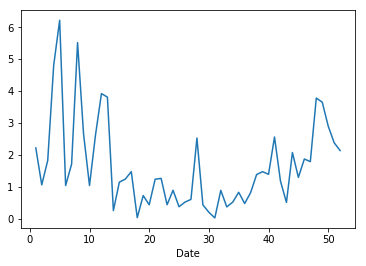

In [73]:
weekly.plot()

In [75]:
weekly.astype(int).sum()

62

In [78]:
# That means we need a multiplier for the 62 that makes sense 

# This page: https://www.seqwater.com.au/water-security-and-consumption-update-16-march-2018
# Says there is about 1Gl of water in South East Queensland at a given amount of time
# This "rough order of scale" is backed by Victoria's home usage of 166L per person, 
# approximating about 1Gl of water used in homes in Victoria each day

# Game wise, we cannot use actual raw values - they would be too hard to track while playing the game.
# Instead, we will use 100Gl as our "total capacity" in the game. It's a nice whole number that we can use.

In [77]:
# That means, we need a way to have our water usage ebb and flow approximately in line with this

# Some playtesting suggested that if we use the following rates, we get there:

In [118]:
weekly_values = (weekly.astype(int) + 1) * 10

water_usage_per_round = 10 # Gigalitre

In [119]:
# Lets do a simulation!

In [120]:
import random
random.randint?

In [121]:
def simulate_game(n_rolls=100):
    idx = 0
    capacity = 100 # Gl
    values_during_game = []
    for i in range(n_rolls):
        idx = idx + random.randint(1, 6)
        idx = idx % len(weekly_values) + 1  # Board wraps around
        capacity += weekly_values.loc[idx]
        values_during_game = []
    return values_during_game, capacity

In [122]:
capacity_results = []
all_values = []

for j in range(1000):
    v, w = simulate_game()
    all_values.append(v)
    capacity_results.append(w)

In [123]:
from matplotlib import pyplot as plt

(array([  4.,  21.,  57., 143., 234., 252., 163.,  85.,  35.,   6.]),
 array([1980., 2041., 2102., 2163., 2224., 2285., 2346., 2407., 2468.,
        2529., 2590.]),
 <a list of 10 Patch objects>)

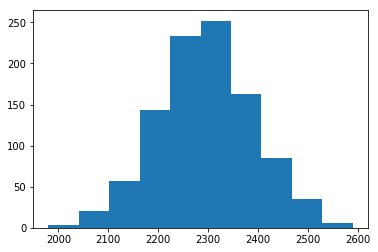

In [124]:
plt.hist(capacity_results)  

In [125]:
# Game is a bit easy - you never run out of water (exclude action cards!) 
# but that's fine for a kids game. To ramp up the difficulty, change the multiplier for weekly_value
# or use more water per round. I'll leave it there for now.
# It also means all our tokens can be for 5Gl, which reduces the amount of tokens needed to play the game 
# (20 per person to start, each worth 5Gl, and add a few 100Gl tokens)

In [126]:
weekly_values

Date
1     30
2     20
3     20
4     50
5     70
6     20
7     20
8     60
9     30
10    20
11    30
12    40
13    40
14    10
15    20
16    20
17    20
18    10
19    10
20    10
21    20
22    20
23    10
24    10
25    10
26    10
27    10
28    30
29    10
30    10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    20
39    20
40    20
41    30
42    20
43    10
44    30
45    20
46    20
47    20
48    40
49    40
50    30
51    30
52    30
Name: Rain, dtype: int64